In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('./calories.csv')

In [3]:
data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
data1=pd.read_csv('./exercise.csv')
data1.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [5]:
df=pd.merge(data,data1,on='User_ID')

In [6]:
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [7]:
df.isnull().sum()

User_ID       0
Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [8]:
df=df.drop(['User_ID'],axis=1)

In [9]:
df.head()

,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [10]:
df['Gender']=df['Gender'].map({'male':0,'female':1}).astype(int)

In [11]:
df.head()

,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,231.0,0,68,190.0,94.0,29.0,105.0,40.8
1,66.0,1,20,166.0,60.0,14.0,94.0,40.3
2,26.0,0,69,179.0,79.0,5.0,88.0,38.7
3,71.0,1,34,179.0,71.0,13.0,100.0,40.5
4,35.0,1,27,154.0,58.0,10.0,81.0,39.8


In [12]:
import matplotlib.pyplot as plt

Age


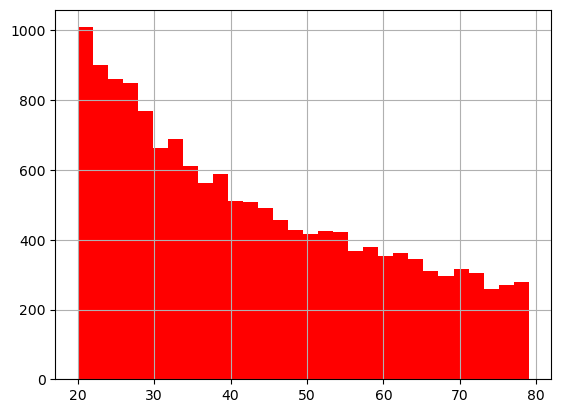

Height


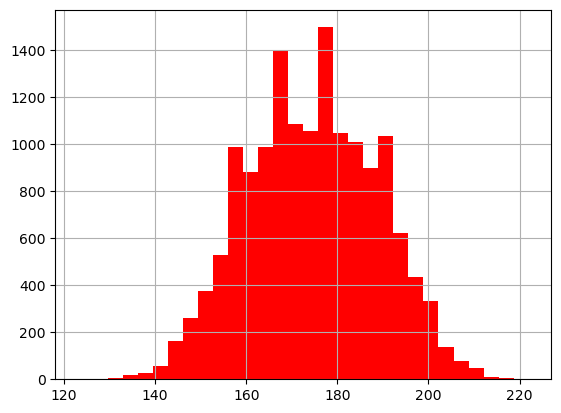

Weight


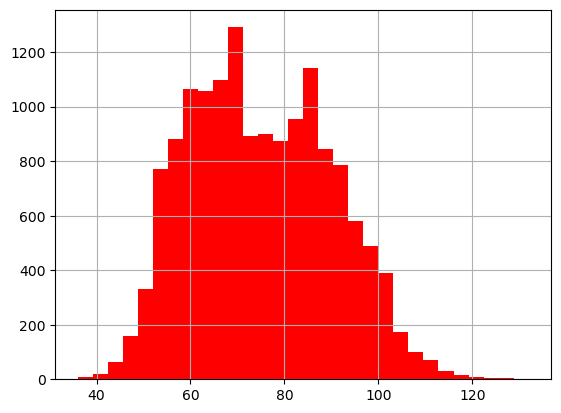

Duration


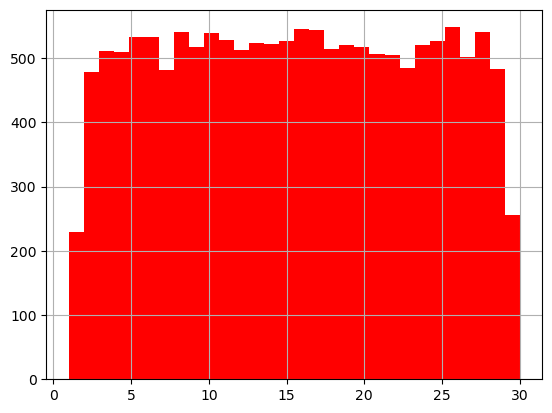

Heart_Rate


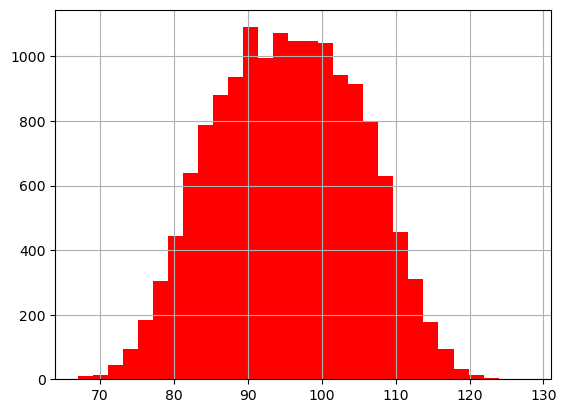

Body_Temp


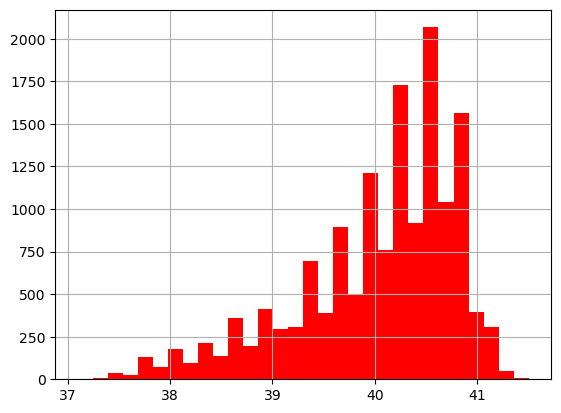

In [13]:
for i in df.columns:
    if i=='Gender' or i=='Calories':
        pass
    else:
        print(i)
        df[i].hist(bins=30,color='r')
    plt.show()   

In [14]:
a=[1,2,3,4,5]
b=[6,7,8,9,10]

for i in zip(a[::],b):
    print(i)

(1, 6)
(2, 7)
(3, 8)
(4, 9)
(5, 10)


In [15]:
a=[1,2,3,4,5]
b=[6,7,8,9,10]

for i in zip(a,b):
    print(i)

(1, 6)
(2, 7)
(3, 8)
(4, 9)
(5, 10)


In [16]:
df.columns

Index(['Calories', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')

In [17]:
import seaborn as sns

In [18]:
import warnings
warnings.filterwarnings('ignore')

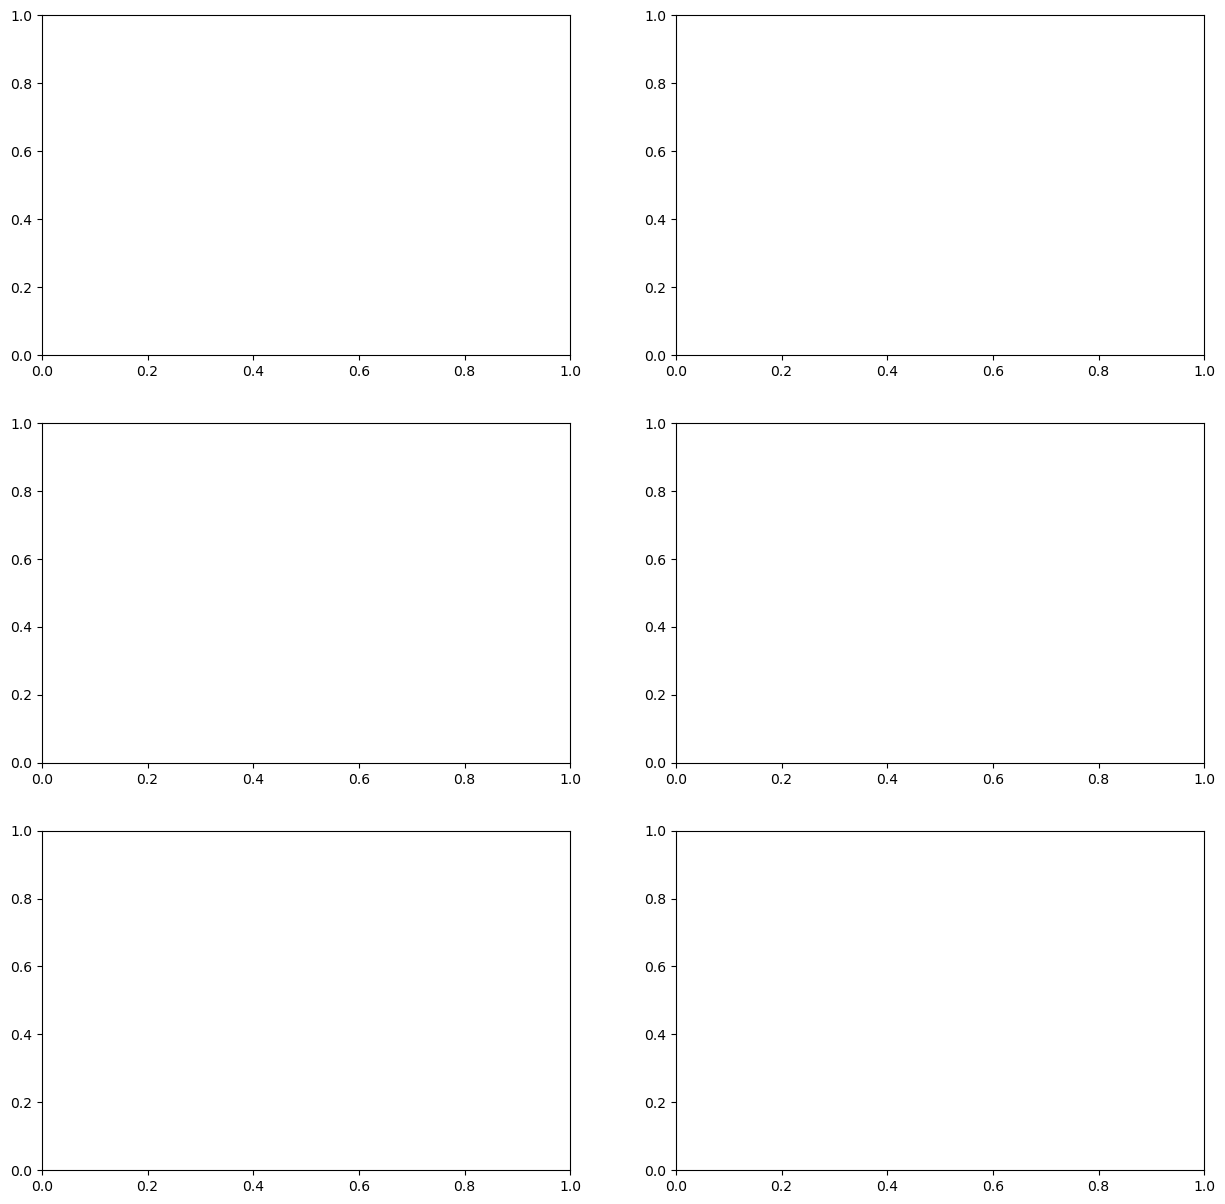

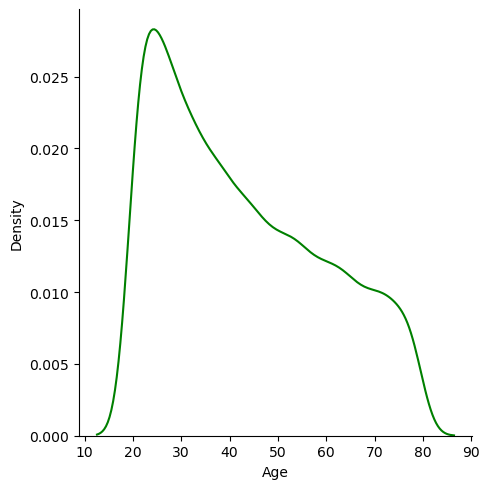

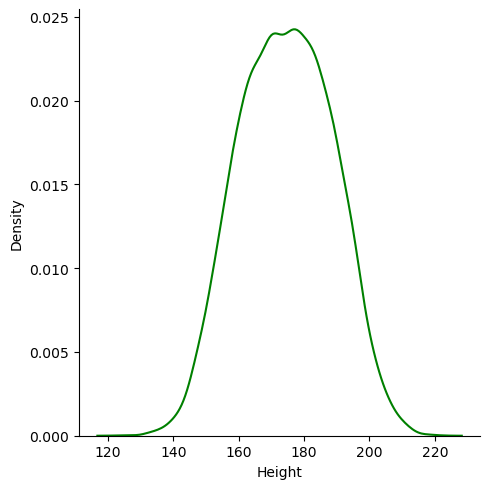

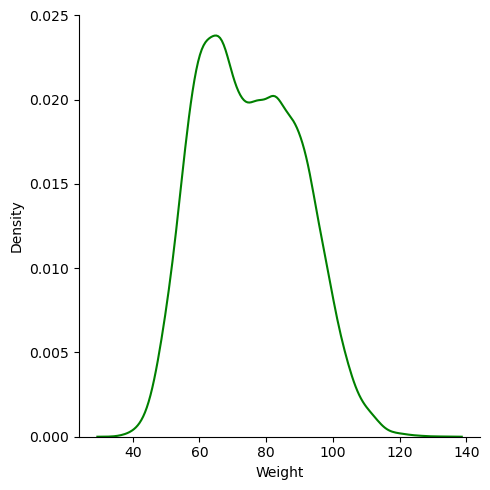

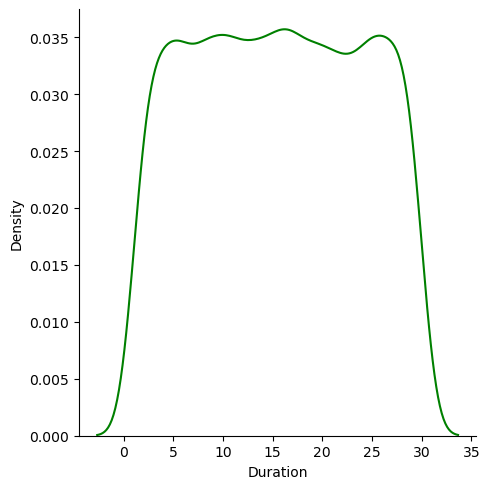

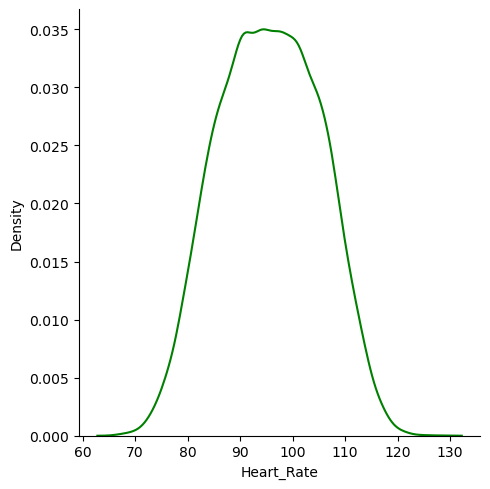

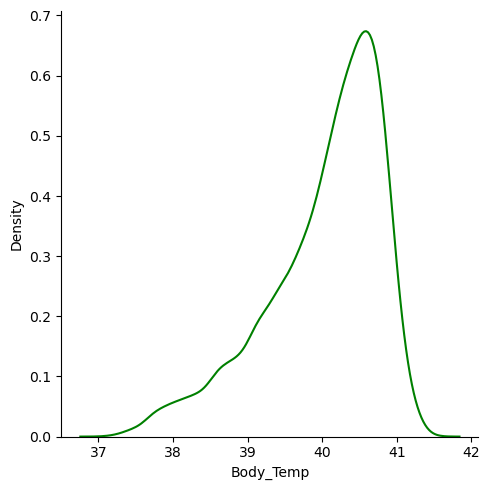

In [19]:
a=['Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp']
fig,ax=plt.subplots(3,2, figsize=(15,15))
for i,subplot in zip(a,ax.flatten()):
    sns.displot(df[i],ax=subplot,color = 'g',kind='kde')

Age


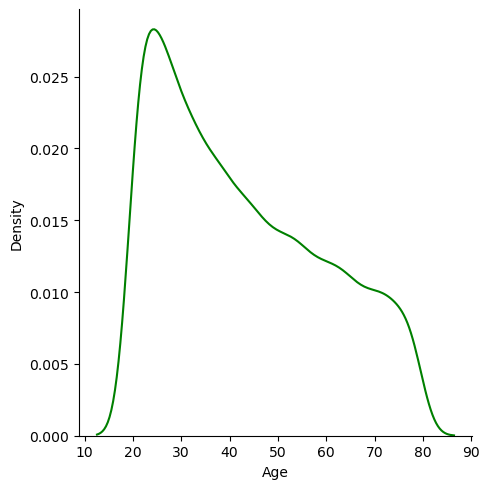

Height


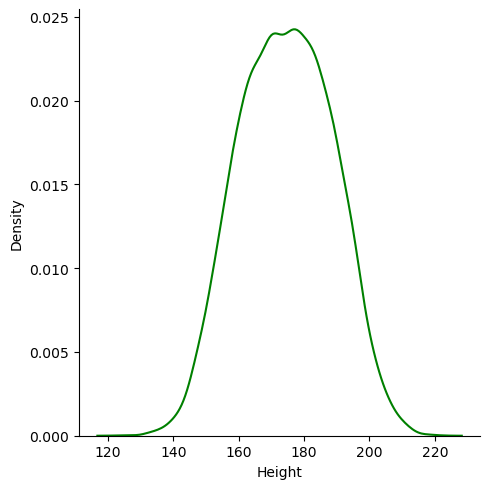

Weight


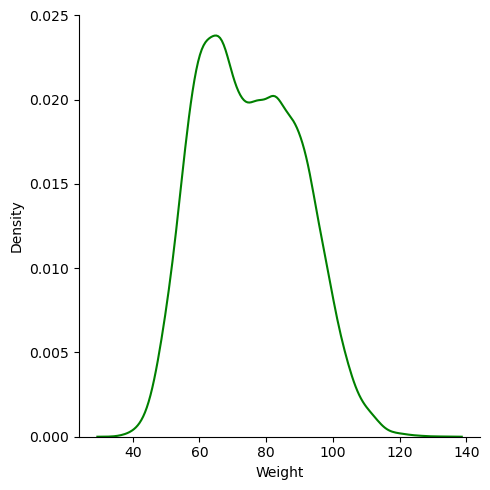

Duration


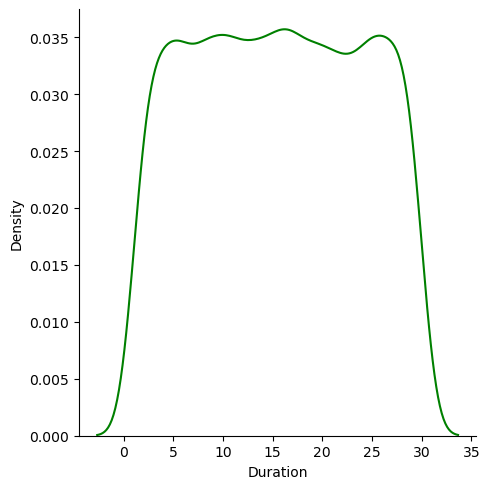

Heart_Rate


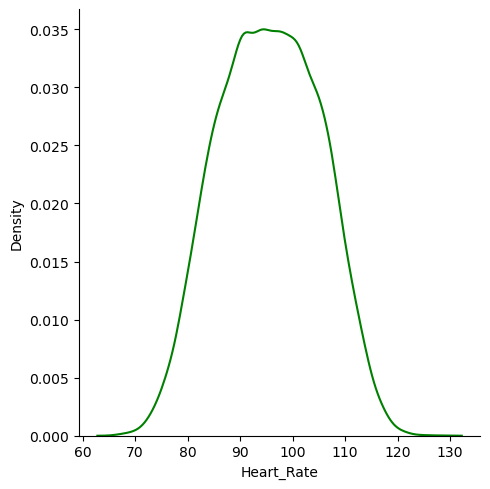

Body_Temp


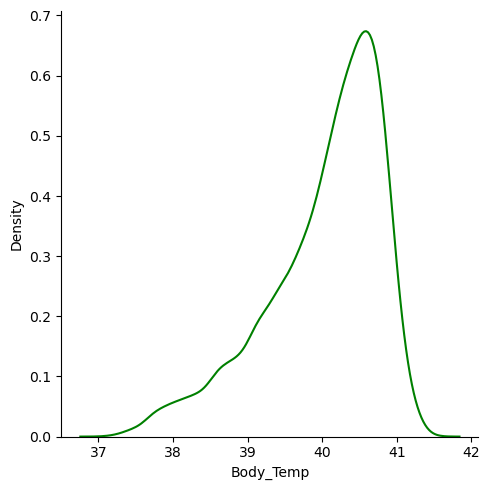

In [20]:
for i in df.columns:
    if i=='Gender' or i=='Calories':
        pass
    else:
        print(i)
        sns.displot(df[i],color='g',kind='kde')
    plt.show()    

In [21]:
from sklearn.model_selection import train_test_split

In [35]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
reg=LinearRegression()

In [39]:
reg.fit(X_train,y_train)

LinearRegression()

In [40]:
reg.coef_

array([  1.37736727,   0.49954826,  -0.17984834,   0.29769877,
         6.61981819,   1.99372814, -16.94785453])

In [41]:
reg.intercept_

461.5708592857323

In [42]:
y_train_pred = reg.predict(X_train)
from sklearn.metrics import r2_score
r2_score(y_train,y_train_pred)

0.9676004204744926

In [43]:
y_test_pred=reg.predict(X_test)

In [44]:
from sklearn.metrics import r2_score

In [45]:
r2_score(y_test,y_test_pred)

0.9663701348612177

In [46]:
y_test_pred = reg.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

0.9663701348612177

- `Saving Model`

In [47]:
import pickle 

In [48]:
with open('./calories.pklpractice_by_me' , 'wb') as f:
    pickle.dump(reg , f)

# Now pickle file is your model

In [49]:
model=pickle.load(open('calories.pklpractice_by_me','rb'))

In [50]:
X_train.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp'],
      dtype='object')

In [51]:
model.predict([[1,22,67,29,100,45,60]])[0]

205.35002731976368